## Non-linear convection 
$$
\frac{\partial u}{\partial t} = u\frac{\partial u}{\partial x}\\
u^{n+1}_{i} = u^{n}_{i} - u^{n}_{i}\frac{\Delta t}{\Delta x}(u^{n}_{i} - u^{n}_{i-1})
$$
$ u(x_{0},t_{0})\Rightarrow u(3,0) = 2$ & $u(x_{0},t_{0}) = 1$ elsewhere

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc 

In [64]:
# constants
nx = 50
x_length = 10
time_step = 400
dt = 0.1
dx = x_length/(nx-1)

#init 
u0 = np.zeros(nx)
u0[:] = 1
u0[int(3/dx):int(4/dx)] = 2
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


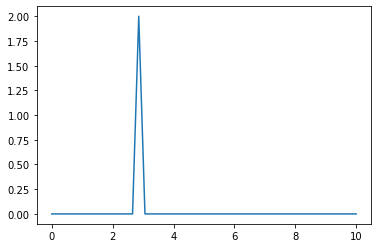

In [5]:
xs = np.linspace(0,x_length,nx )
plt.plot(xs,u0)

In [52]:
# finite difference
new_u = u0.copy()

for _ in range(2):    
    for i in range(1,nx):
        u0[i] = new_u[i] - new_u[i]* (dt/dx) * (new_u[i] - new_u[i-1])
xs = np.linspace(0,x_length)
print(new_u,u0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    1.804 2.    2.    2.    2.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.   ]


MovieWriter ffmpeg unavailable; using Pillow instead.


<function matplotlib.pyplot.show(close=None, block=None)>

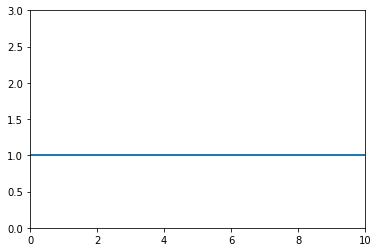

In [65]:
# animate

#init 
u0 = np.zeros(nx)
u0[:] = 1
u0[int(3/dx):int(4/dx)] = 2
#print(u0)

fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, x_length), ylim=(0, 3))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([],[])
    return (line,)

def animate(frame):
    xs = np.linspace(0,x_length)
    new_u = u0.copy()
    for _ in range(time_step):    
        for i in range(1,nx):
            u0[i] = new_u[i] - new_u[i]* (dt/dx) * (new_u[i] - new_u[i-1])
    line.set_data(xs,new_u)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=time_step)
anim.save('non-linear convection 1d.gif', fps = 20)
plt.show